## 01 - Carregando Pacotes

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

## 02 - Carregando a Base

In [ ]:
df = pd.read_csv("dataset.csv", index_col=0)
df.head()

,cnt,season,holliday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
id,,,,,,,,,,
399,4151,1,0,5,1,1,0.313333,0.309346,0.526667,0.178496
590,6544,3,0,0,0,1,0.700833,0.644579,0.530417,0.122512
80,2077,2,0,1,1,2,0.430435,0.409735,0.737391,0.288783
144,4492,2,0,2,1,2,0.660000,0.604813,0.740833,0.207092
398,3761,1,0,4,1,2,0.399167,0.398971,0.672917,0.187187


## 03 - Análise Exploratória e Pré Processamento

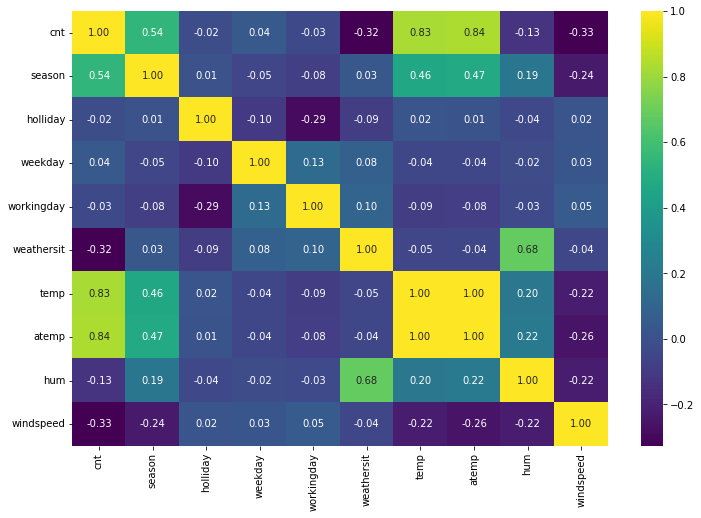

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

In [ ]:
df = df.drop(columns=['temp'])

In [ ]:
features = ["cnt"]
scaler = MinMaxScaler()
df[features]= scaler.fit_transform(df[features])

## 04 - Modelo de Regressão

In [ ]:
X = sm.add_constant(df.drop('cnt', axis=1))
y = df['cnt']

In [ ]:
model_rl = sm.OLS(y, X).fit()
model_rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     199.9
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.96e-96
Time:                        12:34:01   Log-Likelihood:                 221.87
No. Observations:                 229   AIC:                            -425.7
Df Residuals:                     220   BIC:                            -394.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3633      0.040      8.982      0.000       0.284       0.443
season         0.0512      0.006      7.967      0.000       0.039       0.064
holliday      -0.0393      0.032     -1.236      0.218      -0.102       0.023
weekday        0.0106      0.003      3.426      0.001       0.004       0.017
workingday     0.0225      0.014      1.638      0.103      -0.005       0.049
weathersit    -0.0591      0.016     -3.768      0.000      -0.090      -0.028
atemp          1.1743      0.043     27.198      0.000       1.089       1.259
hum           -0.4715      0.059     -7.931      0.000      -0.589      -0.354
windspeed     -0.5008      0.084     -5.987      0.000      -0.666      -0.336
==============================================================================
Omnibus:                        3.874   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.515
Skew:                          -0.252   Prob(JB):                        0.172
Kurtosis:                       3.338   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X2 = sm.add_constant(df.drop(['cnt', 'holliday', 'workingday'] , axis=1))
y2 = df['cnt']

In [ ]:
model_rl_2 = sm.OLS(y2, X2).fit()
model_rl_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     261.1
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.26e-97
Time:                        12:34:03   Log-Likelihood:                 218.92
No. Observations:                 229   AIC:                            -423.8
Df Residuals:                     222   BIC:                            -399.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3749      0.040      9.486      0.000       0.297       0.453
season         0.0507      0.006      7.831      0.000       0.038       0.063
weekday        0.0115      0.003      3.737      0.000       0.005       0.018
weathersit    -0.0542      0.016     -3.458      0.001      -0.085      -0.023
atemp          1.1732      0.044     26.951      0.000       1.087       1.259
hum           -0.4828      0.060     -8.089      0.000      -0.600      -0.365
windspeed     -0.5022      0.084     -5.956      0.000      -0.668      -0.336
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.470
Skew:                          -0.170   Prob(JB):                        0.479
Kurtosis:                       3.197   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred_rl = model_rl_2.predict(X2)
rmse_rl = float(format(np.sqrt(mean_squared_error(y, y_pred_rl)), '.3f'))

## 05 - Modelo de Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 50)
model_rf.fit(X, y)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred = model_rf.predict(X)
rmse_rf = float(format(np.sqrt(mean_squared_error(y, y_pred)), '.3f'))

## 06 - Comparação Entre Modelos

In [ ]:
print("\nRMSE - Regressão: ", rmse_rl)
print("\nRMSE - Random Forest: ", rmse_rf)


RMSE - Regressão:  0.093

RMSE - Random Forest:  0.034
